In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase

In [4]:
os.path.abspath(os.curdir)

os.chdir("..")
base_path = os.path.abspath(os.curdir)

In [5]:
naep_path = base_path+"\\Data\\US-Educational-Finances\\naep.csv"

In [6]:
dfnaep= pd.read_csv(naep_path)

In [7]:
dfnaep['AVG_SCORE']= pd.to_numeric(dfnaep['AVG_SCORE'], errors= 'coerce')

dfnaep.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR
0,2017,Alabama,232.170688,Mathematics,4
1,2017,Alaska,230.456278,Mathematics,4
2,2017,Arizona,234.435788,Mathematics,4
3,2017,Arkansas,233.848144,Mathematics,4
4,2017,California,232.262941,Mathematics,4


In [8]:
dfnaep.describe()

,YEAR,AVG_SCORE,TEST_YEAR
count,2305.000000,2175.000000,2305.000000
mean,2006.052928,248.287075,5.964425
std,7.602698,25.226085,2.000117
min,1990.000000,178.557612,4.000000
25%,2002.000000,224.864679,4.000000
50%,2007.000000,246.513750,4.000000
75%,2013.000000,269.229888,8.000000
max,2017.000000,300.568235,8.000000


In [9]:
#Missing values
dfnaep.isna().sum()

YEAR              0
STATE             0
AVG_SCORE       130
TEST_SUBJECT      0
TEST_YEAR         0
dtype: int64

## How does NAEP performance change over time?
***

In [10]:
def state_year_plot(df, var,states,ylabel,title):
    f, ax = plt.subplots(1, figsize=[8,5])
    for state in states:
        ax.plot(df[var][df["STATE"] == state], label=state)
    ax.legend(fontsize='large', loc='center left',bbox_to_anchor=(1, 0.5))
    ax.set_xlabel("Year")
    ax.set_ylabel(ylabel)
    ax.set_title(title)

In [11]:
#New df
newdf = round(dfnaep[["AVG_SCORE","YEAR","STATE"]].groupby(["YEAR","STATE"]).mean().mul(100),2).reset_index().set_index("YEAR")
# Top / Bottom States
sort_exp = dfnaep.groupby("STATE").mean().sort_values(by="AVG_SCORE", ascending=False).reset_index()
top = list(sort_exp["STATE"].head())
bot = list(sort_exp["STATE"].tail())

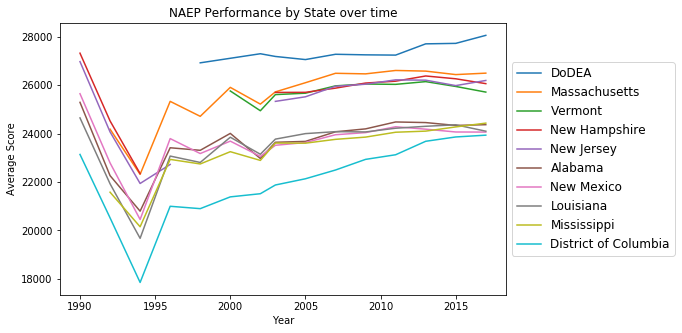

In [12]:
# Plot
state_year_plot(df=newdf, var="AVG_SCORE", states= top+bot,ylabel="Average Score",title="NAEP Performance by State over time" )

## How do scores compare across test subject?
***

C:\Users\cschu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1584x1080 with 0 Axes>

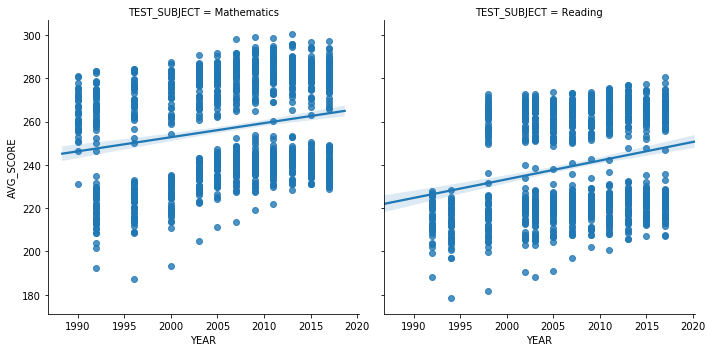

In [13]:
#Reading vs Math plot
plt.figure(figsize =( 22,15))
g = sns.lmplot(x="YEAR",y='AVG_SCORE', 
           data=dfnaep, col="TEST_SUBJECT",sharey=True)
plt.show()

## Average test score by state and test subject
***

In [31]:
group_STATE=dfnaep.groupby(['STATE','TEST_SUBJECT']).AVG_SCORE.mean()
group_STATE = group_STATE.to_frame()
# group_STATE.reset_index(inplace=True)
# group_STATE.reset_index(level=['TEST_SUBJECT'], inplace=True)

In [32]:
group_STATE.head()

AVG_SCORE
STATE   TEST_SUBJECT            
Alabama Mathematics   244.597680
        Reading       232.042724
Alaska  Mathematics   257.203412
        Reading       234.951166
Arizona Mathematics   252.416513

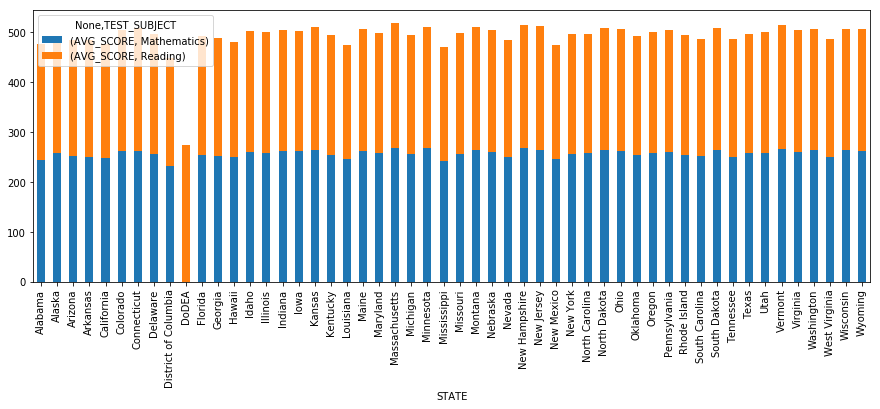

In [43]:
group_STATE.unstack().plot(kind='bar', stacked=True,figsize=(15,5))
plt.show()

In [44]:
#FL NAEP data only
flNaep=dfnaep[(dfnaep.STATE=='Florida')]

In [ ]:
#Read flNaep to csv
# flNaep.to_csv('Florida_naep', sep= '\t', encoding= 'utf-8')

In [ ]:
# Read score by state dataframe to csv
#group_STATE.to_csv('States_avg_naep', sep= '\t', encoding= 'utf-8')